In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('../data/mbti_1.csv')

In [3]:
data.head()

type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...

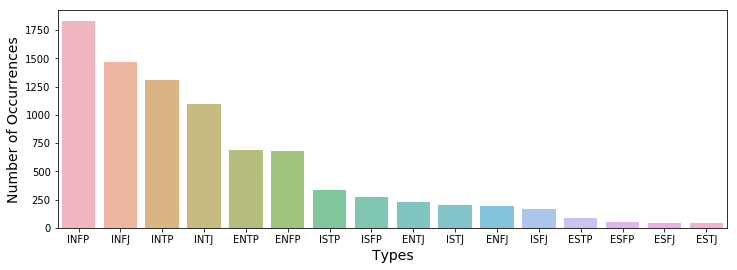

In [37]:
count_types = data['type'].value_counts()

plt.figure(
    figsize=(12,4)
)
sns.barplot(
    count_types.index,
    count_types.values, 
    alpha=0.7
)
plt.ylabel(
    'Number of Occurrences',
    fontsize=14
)
plt.xlabel(
    'Types', 
    fontsize=14
)
plt.show()

# Augment the Data

In [4]:
def var_row(row):
    """
    Compute the variance of a string.

    :param row: string of words where each comment is seperated by |||
    :type  row: str
    :return: Variance of the words
    :rtype:  float
    """

    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)


data['Average Words Per Comment'] = data['posts'].apply(
    lambda x: len(x.split())/50
)

data['Variance of Word Counts'] = data['posts'].apply(
    lambda x: var_row(x)
)

data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

   Average Words Per Comment  Variance of Word Counts  
0                      11.12                 135.2900  
1                      23.40                 187.4756  
2                      16.72                 180.6900  
3                      21.28                 181.8324  
4                      19.34                 196.4576

In [8]:
data['HTTP Per Comment'] = data['posts'].apply(
    lambda x: x.count('http')/50
)
data['Question Mark Per Comment'] = data['posts'].apply(
    lambda x: x.count('?')/50
)
data.head()

type                                              posts  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...   
1  ENTP  'I'm finding the lack of me in these posts ver...   
2  INTP  'Good one  _____   https://www.youtube.com/wat...   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...   
4  ENTJ  'You're fired.|||That's another silly misconce...   

   Average Words Per Comment  Variance of Word Counts  HTTP Per Comment  \
0                      11.12                 135.2900              0.48   
1                      23.40                 187.4756              0.20   
2                      16.72                 180.6900              0.10   
3                      21.28                 181.8324              0.04   
4                      19.34                 196.4576              0.12   

   Question Mark Per Comment  
0                       0.36  
1                       0.10  
2                       0.24  
3                       0.22  
4                       0.20

In [9]:
data.groupby('type').agg({'HTTP Per Comment': 'mean'})

HTTP Per Comment
type                  
ENFJ          0.053263
ENFP          0.050459
ENTJ          0.053160
ENTP          0.048263
ESFJ          0.027143
ESFP          0.055417
ESTJ          0.052821
ESTP          0.064719
INFJ          0.065878
INFP          0.075426
INTJ          0.063593
INTP          0.070767
ISFJ          0.070602
ISFP          0.088339
ISTJ          0.061171
ISTP          0.081009

In [10]:
data.groupby('type').agg({'Question Mark Per Comment': 'mean'})

Question Mark Per Comment
type                           
ENFJ                   0.213053
ENFP                   0.227259
ENTJ                   0.240000
ENTP                   0.220964
ESFJ                   0.176190
ESFP                   0.237083
ESTJ                   0.209744
ESTP                   0.245843
INFJ                   0.208966
INFP                   0.202533
INTJ                   0.214849
INTP                   0.221580
ISFJ                   0.200964
ISFP                   0.216384
ISTJ                   0.214927
ISTP                   0.221602

# Swarm Plots

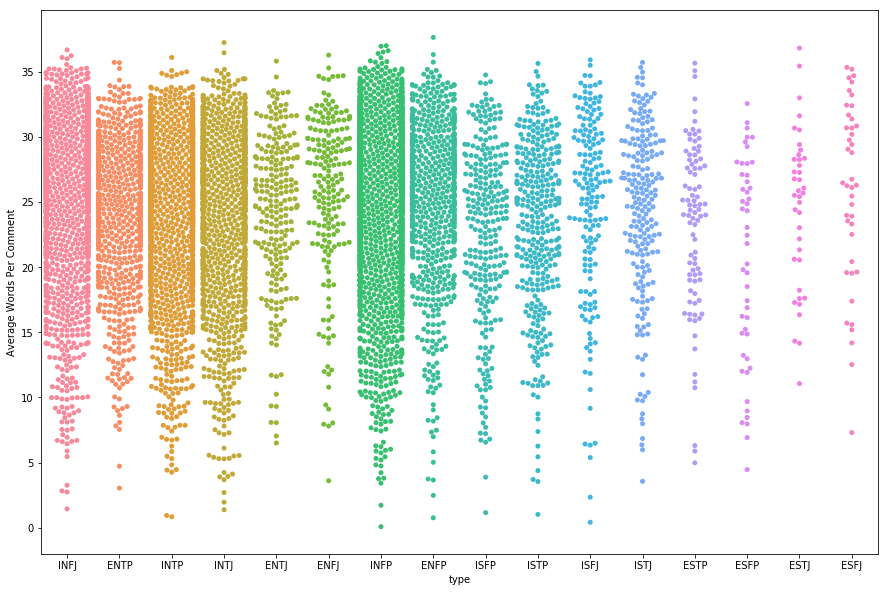

In [32]:
def swarmplot(col_name):
    plt.figure(figsize=(15,10))
    sns.swarmplot(
        "type", 
        col_name,
        data=data
    )
    plt.show()
    
swarmplot("Average Words Per Comment")

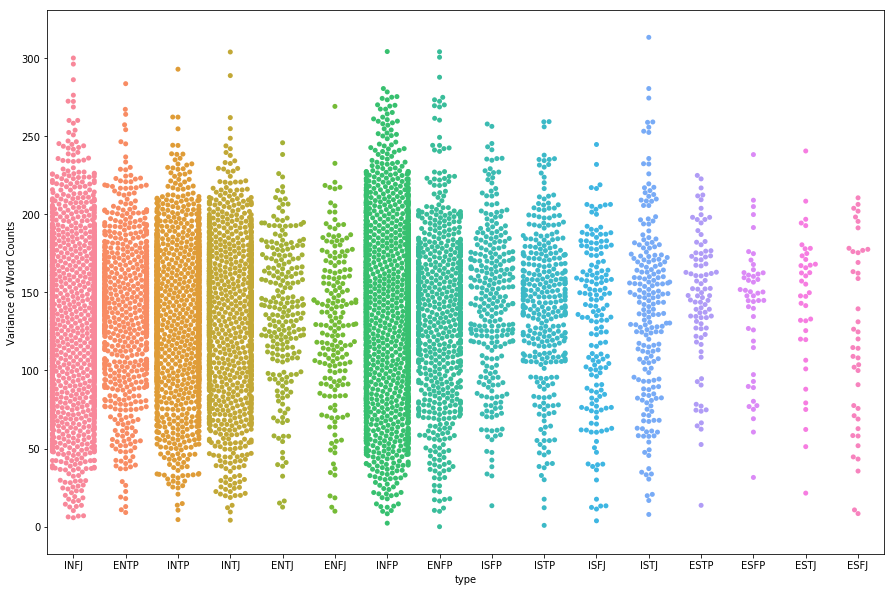

In [33]:
swarmplot("Variance of Word Counts")

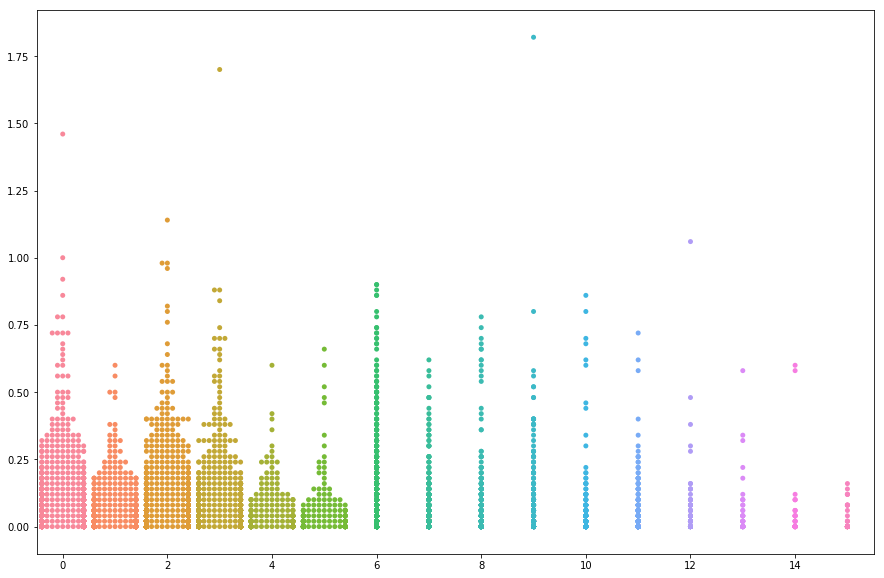

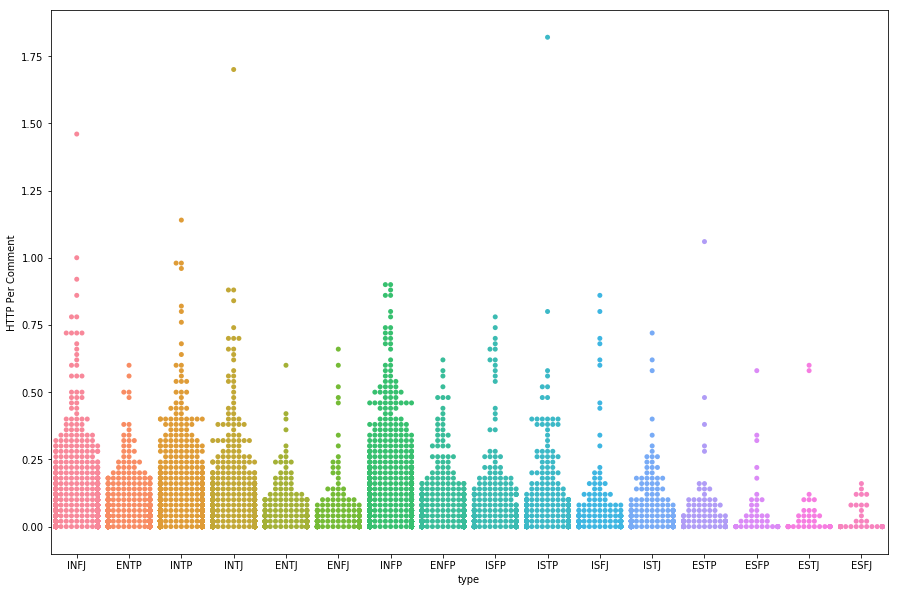

In [35]:
swarmplot("HTTP Per Comment")

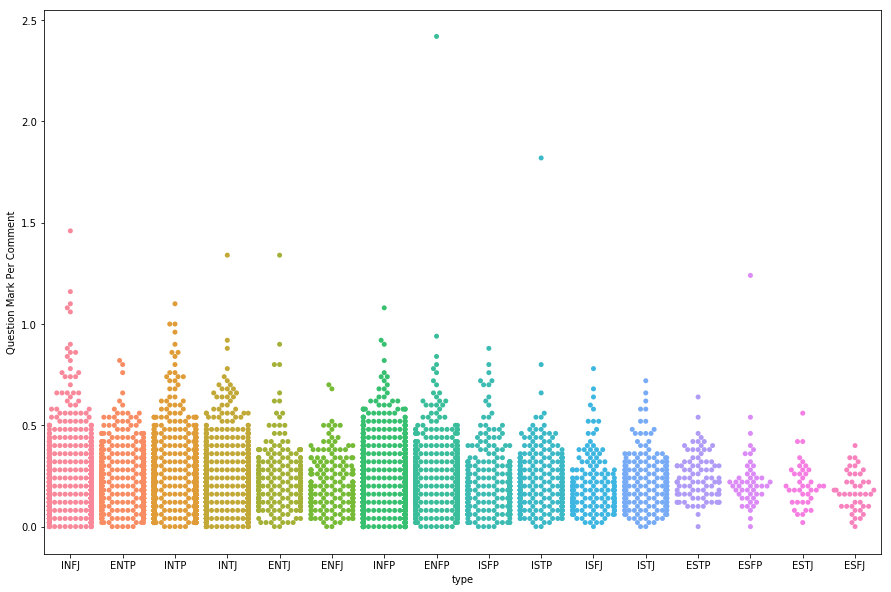

In [36]:
swarmplot("Question Mark Per Comment")

# Hex Plots

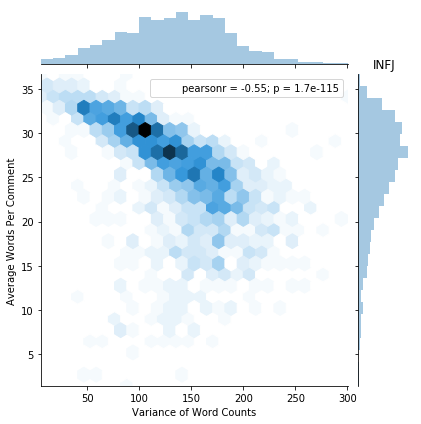

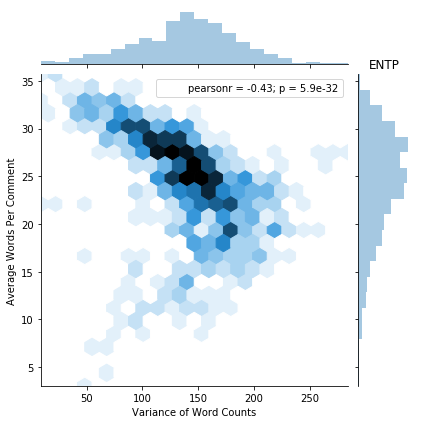

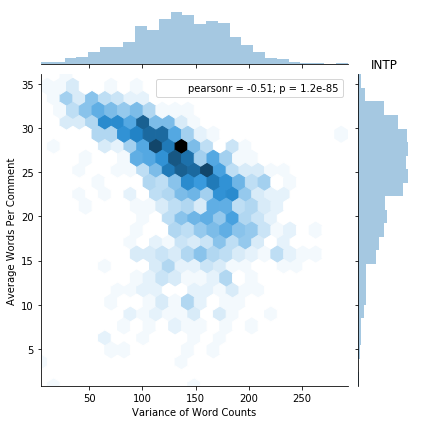

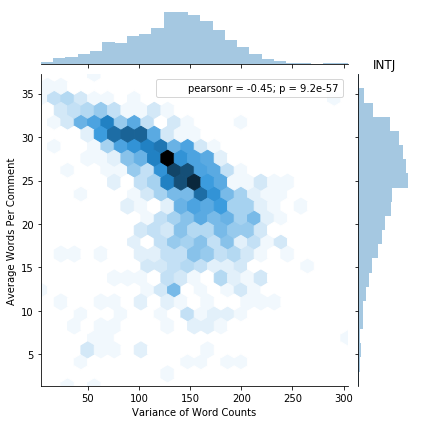

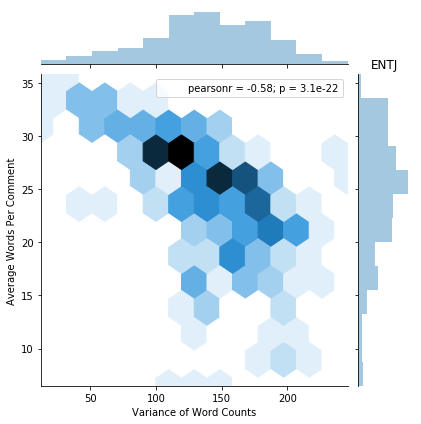

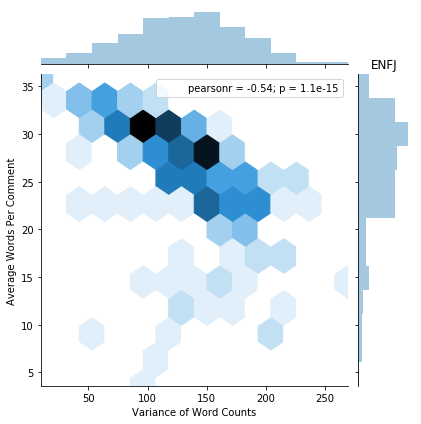

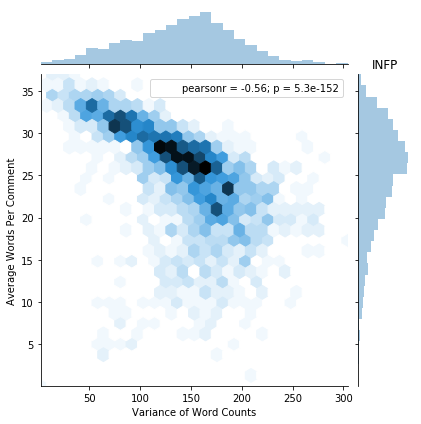

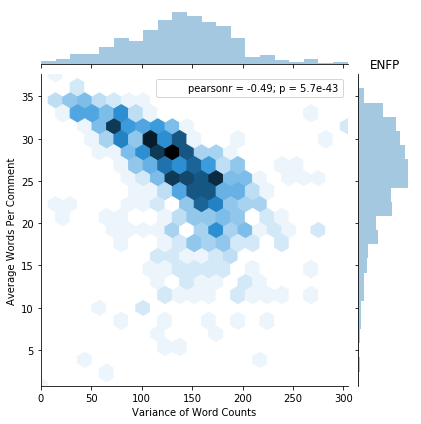

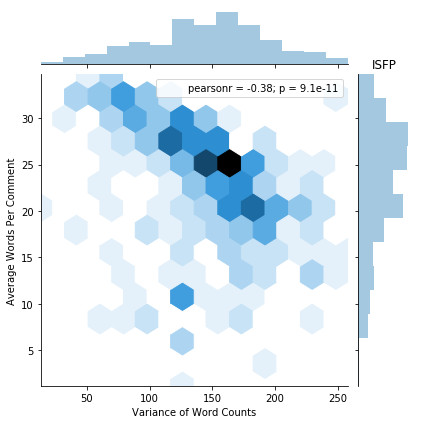

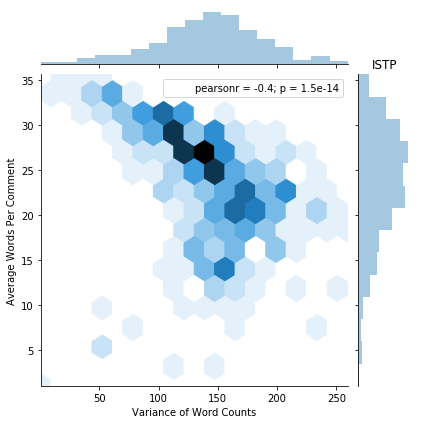

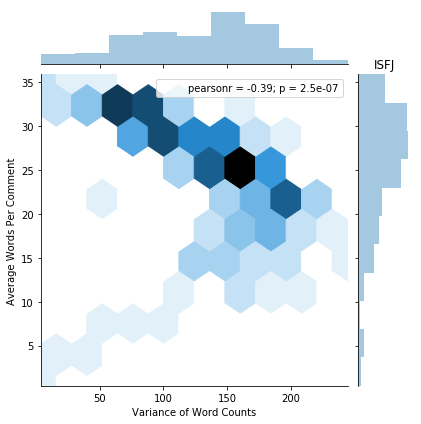

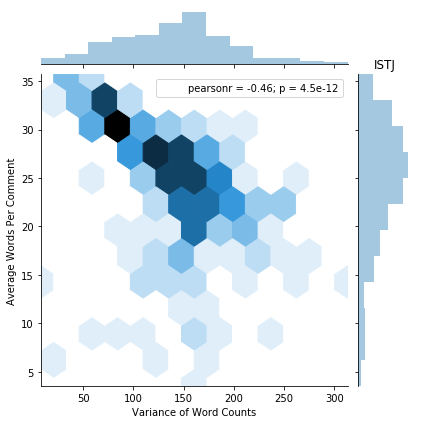

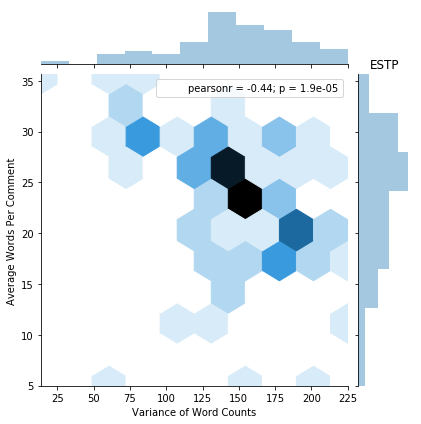

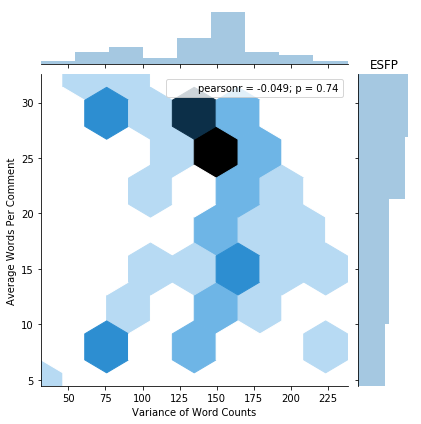

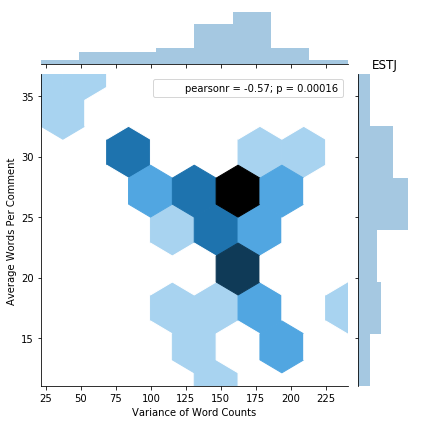

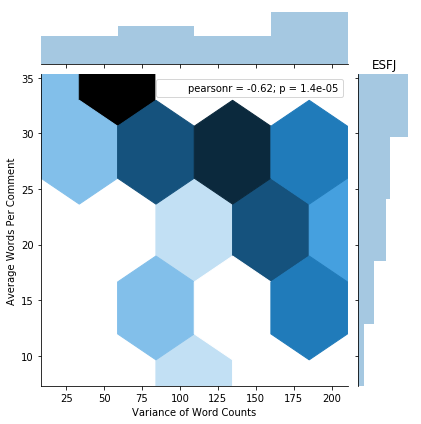

In [13]:
MBTI_types = data['type'].unique()
k = 0
for m in range(0,2):
    for n in range(0,8):
        df = data[data['type'] == MBTI_types[k]]
        sns.jointplot(
            "Variance of Word Counts", 
            "Average Words Per Comment",
            data=df, 
            kind="hex"
        )
        plt.title(MBTI_types[k])
        k+=1
plt.show()

# Word Clouds

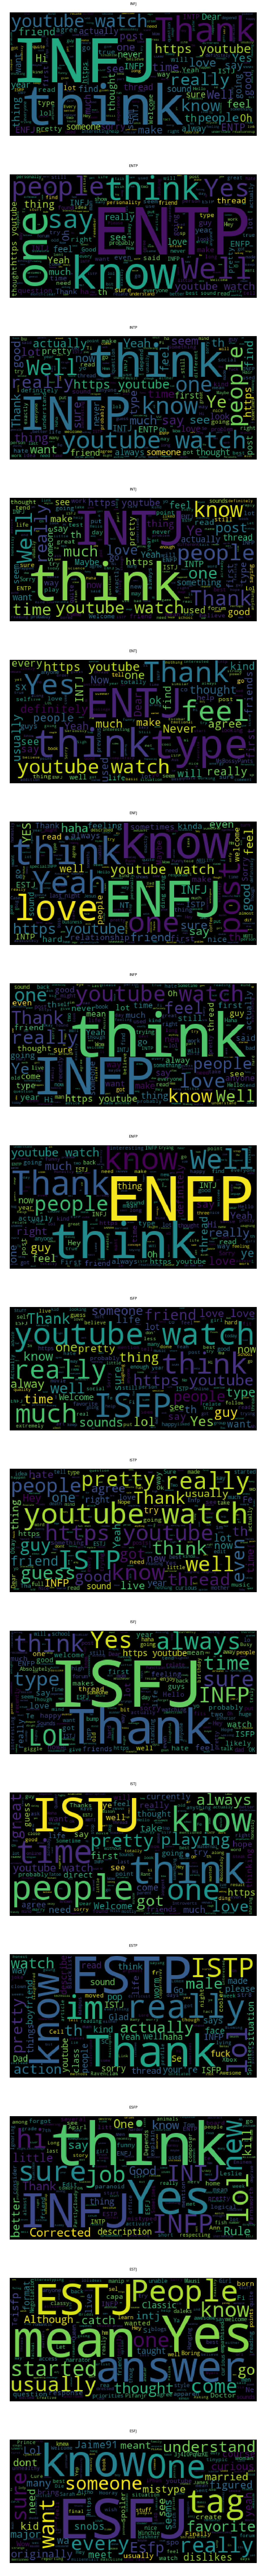

In [22]:
from wordcloud import WordCloud

fig, ax = plt.subplots(
    len(data['type'].unique()), 
    sharex=True, 
    figsize=(
        15,
        10*len(data['type'].unique())
    )
)

k = 0
for i in data['type'].unique():
    df = data[data['type'] == i]
    wordcloud = WordCloud().generate(
        df['posts'].to_string()
    )
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1
plt.show()

# Take a Peak Inside The Comments

In [49]:
index = 36
data['posts'][index].split('|||')

["'Poker face for sure, accompanied by some sarcasm probably! But inside I'm running a pretty vivid list of pros and cons starting with asking myself 'do I like them back'? I probably know the answer...",
 '1. Babies are illogical. 2. Nobody is despised who can manage a crocodile. 3. Illogical persons are despised. Therefore, babies cannot manage crocodiles.  1. No interesting poems are unpopular...',
 "Well yeah, zero sounds legitimate, but I've found for myself that there are other life forms besides me, who are quite interesting and worth a chance, at least one chance and I tend to give them...",
 "That's why you shouldn't explain to everybody but just the ones you care about and want to keep around :wink:",
 "I went in, did my thing and got out and picked up few really valuable friendships from each uni.  Never though that this had to be the best time of my life. It wasn't bad but also not the best....",
 "Don't know about others but for me such questions are really annoying and mo

In [50]:
"""
Observations:

Each comment is capped at 199 characters.
Each comment can have multiple sentences that are cut off (and ends with ...)
Some people include links, and these links can convey information
Misspelled words, sometimes to convey meaning. Ex. "cuute"
There are acrynonyms that I am not familar with 
Punctuations ! and ? convey alot about the person.
:) -Happy face.
"""

"""
Questions:

What is [/QUOTE]?
What does it mean when the person does :WORD: 
    I think it indicates what the person is doing while typing.
    For example, I've seen :laughing:, :happy:
"""
print ('')